In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np
import tensorflow as tf

In [2]:
x_a = np.random.multivariate_normal([1,1],[[1,0],[0,1]],size=100)
y_a = np.zeros([100,1],dtype=np.int)
x_b = np.random.multivariate_normal([3,3],[[1,0],[0,1]],size=100)
y_b = np.ones([100,1],dtype=np.int)

In [3]:
_x = np.append(x_a,x_b,axis=0)
_y = np.append(y_a,y_b,axis=0)

In [4]:
learning_rate = 0.5
x = tf.placeholder(tf.float32,[None,2],name='x')
y = tf.placeholder(tf.float32,[None,1],name='y')
w = tf.Variable(np.zeros([2,1]),name='w',dtype=tf.float32)
b = tf.Variable(np.zeros([1,1]),name='b',dtype=tf.float32)
y_hat = tf.sigmoid(tf.matmul(x,w) + b)
cost = tf.reduce_mean(tf.abs(y - y_hat))
gradient = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)  

In [5]:
init = tf.global_variables_initializer()
session =  tf.Session()
session.run(init)
for i in range(10000):
    c,g = session.run([cost,gradient],feed_dict={x:_x,y:_y})
    if c < 0.1:
        break

In [6]:
__w = w.eval(session)
__b = b.eval(session)
__x = np.linspace(-2,6,num=10)
__y = (-__b[0,0] - __x * __w[0,0]) / __w[1,0] 

[[ 4.97912693]
 [ 3.52199721]]


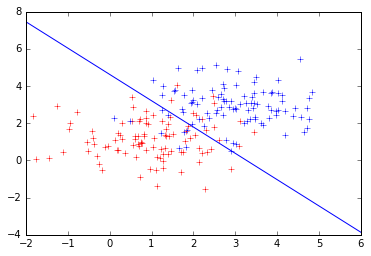

In [7]:
print w.eval(session)



plt.plot(x_a[:,0],x_a[:,1],'r+')
plt.plot(x_b[:,0],x_b[:,1],'b+')
plt.plot(__x,__y)